# import library

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# read file

In [144]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\OnlineRetail(1).csv", encoding= 'unicode_escape')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [146]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [147]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011.

In [149]:
df['year'] = df['InvoiceDate'].dt.year

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   year         541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [151]:
df_priceAndYear = df[['Quantity', 'UnitPrice','InvoiceDate', 'year']]

In [152]:
df_priceAndYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     541909 non-null  int64         
 1   UnitPrice    541909 non-null  float64       
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   year         541909 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 16.5 MB


In [153]:
df_priceAndYear = df_priceAndYear.astype({'year': 'str'}) 

In [154]:
df_priceAndYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     541909 non-null  int64         
 1   UnitPrice    541909 non-null  float64       
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   year         541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 16.5+ MB


In [155]:
df_priceAndYear.head()

,Quantity,UnitPrice,InvoiceDate,year
0,6,2.55,2010-12-01 08:26:00,2010
1,6,3.39,2010-12-01 08:26:00,2010
2,8,2.75,2010-12-01 08:26:00,2010
3,6,3.39,2010-12-01 08:26:00,2010
4,6,3.39,2010-12-01 08:26:00,2010


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

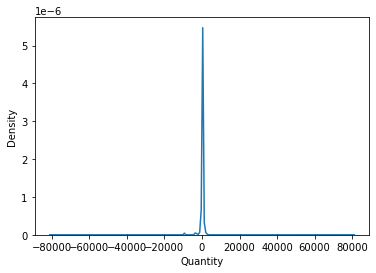

In [156]:
sns.kdeplot(df_priceAndYear['Quantity'])

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

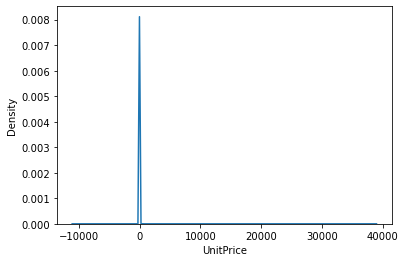

In [157]:
sns.kdeplot(df_priceAndYear['UnitPrice'])

+ xử lí dữ liệu ngoại lai

In [158]:
val = df_priceAndYear[df_priceAndYear['Quantity'] < 0]['Quantity'].values
val_unitprice = df_priceAndYear[df_priceAndYear['UnitPrice'] < 0]['UnitPrice'].values

In [159]:
df_priceAndYear['Quantity'].mode

<bound method Series.mode of 0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 541909, dtype: int64>

In [160]:
df_priceAndYear['UnitPrice'].mode

<bound method Series.mode of 0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 541909, dtype: float64>

In [161]:
df_priceAndYear['Quantity'] = df_priceAndYear['Quantity'].replace(to_replace = list(val), value = 12)

In [164]:
df_priceAndYear['UnitPrice'] = df_priceAndYear['UnitPrice'].replace(to_replace = list(val_unitprice), value = 3.39)

In [165]:
df_priceAndYear['Month'] = df_priceAndYear['InvoiceDate'].dt.month

In [166]:
df_priceAndYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Quantity     541909 non-null  int64         
 1   UnitPrice    541909 non-null  float64       
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   year         541909 non-null  object        
 4   Month        541909 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 20.7+ MB


In [167]:
df_priceAndYear['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    56,    72,
         200,   600,   480,    14,    11,    33,    13,    70,   252,
          60,   216,   384,    27,    15,    22,    19,    17,    21,
          34,    47,   108,    52,    75,   270,    42,   240,    90,
         320,  1824,   204,    69,   160,  2880,  1400,    39,    26,
        1440,    31,    82,    78,    97,    98,    35,    57,   110,
         720,   156,   324,    38,    37,    49,    95,    29,    41,
         402,   378,   150,   300,    54,   104,    67,   258,    66,
          44,    55,    46,    99,    61,   408,   972,   208,  1008,
        1000,  1488,   250,  1394,   400,    79,    84,   272,   113,
          45,   106,    68,   267,   115,    65,  1728,    53,    76,
         460,    71,

In [168]:
df_priceAndYear.head()

,Quantity,UnitPrice,InvoiceDate,year,Month
0,6,2.55,2010-12-01 08:26:00,2010,12
1,6,3.39,2010-12-01 08:26:00,2010,12
2,8,2.75,2010-12-01 08:26:00,2010,12
3,6,3.39,2010-12-01 08:26:00,2010,12
4,6,3.39,2010-12-01 08:26:00,2010,12


In [169]:
df_priceAndYear['total'] = df_priceAndYear['UnitPrice'] * df_priceAndYear['Quantity'] 

In [170]:
df_priceAndYear.head()

,Quantity,UnitPrice,InvoiceDate,year,Month,total
0,6,2.55,2010-12-01 08:26:00,2010,12,15.30
1,6,3.39,2010-12-01 08:26:00,2010,12,20.34
2,8,2.75,2010-12-01 08:26:00,2010,12,22.00
3,6,3.39,2010-12-01 08:26:00,2010,12,20.34
4,6,3.39,2010-12-01 08:26:00,2010,12,20.34


In [176]:
df_priceAndYear2011 = df_priceAndYear[['Month', 'year', 'total', 'Quantity']]

In [177]:
df_priceAndYear2011 = df_priceAndYear2011.iloc[df_priceAndYear2011[df_priceAndYear2011['year'] == '2011'].index, :]

In [178]:
df_priceAndYear2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499428 entries, 42481 to 541908
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Month     499428 non-null  int64  
 1   year      499428 non-null  object 
 2   total     499428 non-null  float64
 3   Quantity  499428 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 19.1+ MB


In [179]:
df_priceAndYear2011.head()

,Month,year,total,Quantity
42481,1,2011,19.5,10
42482,1,2011,10.5,25
42483,1,2011,10.5,25
42484,1,2011,10.5,5
42485,1,2011,12.5,10


In [180]:
df_priceAndYear2011 = df_priceAndYear2011.groupby(by = 'Month').sum()
df_priceAndYear2011.reset_index()

,Month,total,Quantity
0,1,1207578.040,407280
1,2,754977.610,292971
2,3,1027938.600,394946
3,4,700543.381,321116
4,5,1253756.940,408281
5,6,1487463.300,404153
6,7,1066000.431,417163
7,8,1167815.000,433632
8,9,1352119.172,586252
9,10,1635065.940,644897


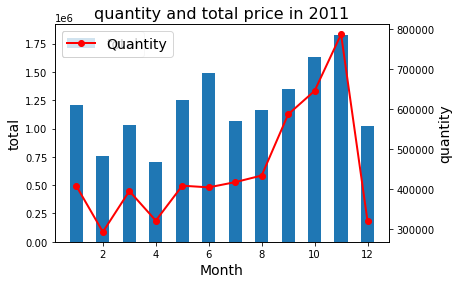

In [184]:
x = df_priceAndYear2011.index.get_level_values(0)
plt.bar(x, df_priceAndYear2011['total'], width = 0.5, label = 'total')
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, df_priceAndYear2011['Quantity'], label = 'Quantity', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Month', fontsize = 14)
axes1.set_ylabel('total', fontsize = 14)
axes2.set_ylabel('quantity', fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title('quantity and total price in 2011', fontsize = 16)
plt.show()